In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder


## t-SNE para datos desbalanceados

In [26]:
df = pd.read_csv("../../new/datasets/unbalanced.csv", header=None)
# Separamos las características y la variable objetivo
X = df.drop(df.columns[-1], axis=1)
y = df.iloc[:, -1]
# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

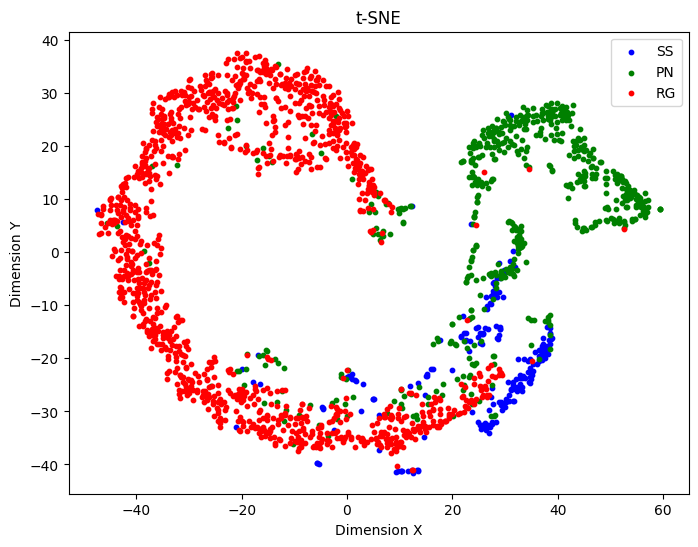

In [27]:
# Aplicar el algoritmo t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Configuración de colores y tamaños
colors = ['blue', 'green', 'red']
labels = ['SS', 'PN', 'RG']
point_size = 10
# Graficar los resultados
plt.figure(figsize=(8, 6))
for i in range(len(colors)):
    plt.scatter(X_embedded[y == i, 0], X_embedded[y == i, 1], c=colors[i], s=point_size, label=labels[i])

plt.title('t-SNE')
plt.xlabel('Dimension X')
plt.ylabel('Dimension Y')
plt.legend()
plt.savefig('tsne-unbalanced.svg', format="svg")
plt.show()

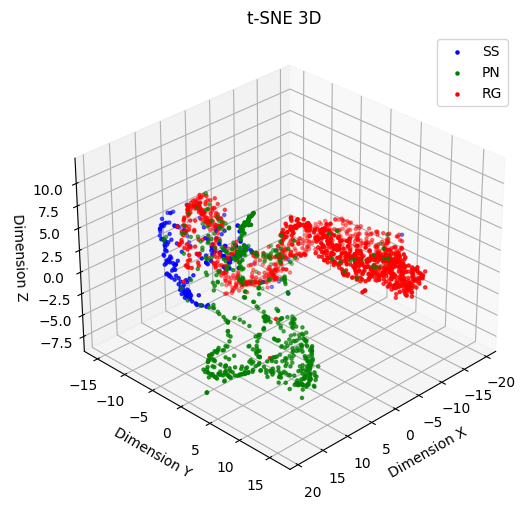

In [20]:
# Aplicar el algoritmo t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_embedded = tsne.fit_transform(X)

# Configurar la figura 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Configurar colores y tamaños de los puntos
colors = ['blue', 'green', 'red']
labels = ['SS', 'PN', 'RG']
sizes = 5

# Graficar los resultados en 3D
for i in range(len(colors)):
    ax.scatter(X_embedded[y == i, 0], X_embedded[y == i, 1], X_embedded[y == i, 2], c=colors[i], s=sizes,
               label=labels[i])

ax.set_title('t-SNE 3D')
ax.set_xlabel('Dimension X')
ax.set_ylabel('Dimension Y')
ax.set_zlabel('Dimension Z')
ax.legend()

# Girar el gráfico
ax.view_init(elev=30, azim=45)
plt.savefig('tsne-3d-unbalanced.svg', format="svg")

plt.show()

## t-SNE para datos balanceados

In [21]:
df = pd.read_csv("../../new/datasets/balanced.csv", header=None)
# Separamos las características y la variable objetivo
X = df.drop(df.columns[-1], axis=1)
y = df.iloc[:, -1]
# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

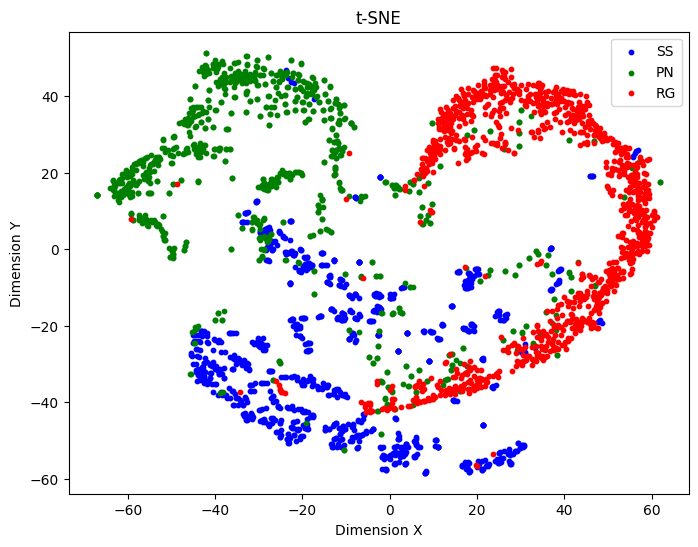

In [24]:
# Aplicar el algoritmo t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Configuración de colores y tamaños
colors = ['blue', 'green', 'red']
labels = ['SS', 'PN', 'RG']
point_size = 10
# Graficar los resultados
plt.figure(figsize=(8, 6))
for i in range(len(colors)):
    plt.scatter(X_embedded[y == i, 0], X_embedded[y == i, 1], c=colors[i], s=point_size, label=labels[i])

plt.title('t-SNE')
plt.xlabel('Dimension X')
plt.ylabel('Dimension Y')
plt.legend()
plt.savefig('tsne-balanced.svg', format="svg")
plt.show()

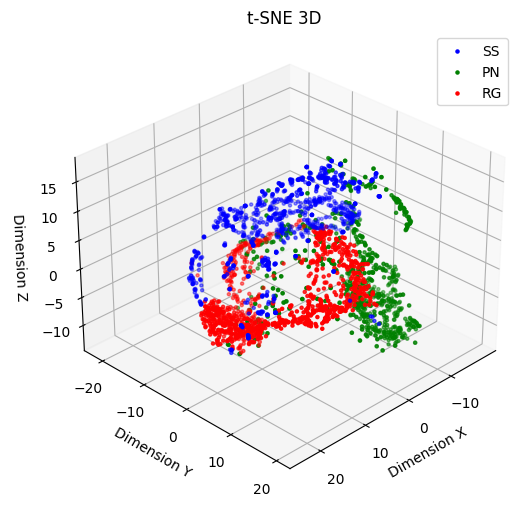

In [25]:
# Aplicar el algoritmo t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_embedded = tsne.fit_transform(X)

# Configurar la figura 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Configurar colores y tamaños de los puntos
colors = ['blue', 'green', 'red']
labels = ['SS', 'PN', 'RG']
sizes = 5

# Graficar los resultados en 3D
for i in range(len(colors)):
    ax.scatter(X_embedded[y == i, 0], X_embedded[y == i, 1], X_embedded[y == i, 2], c=colors[i], s=sizes,
               label=labels[i])

ax.set_title('t-SNE 3D')
ax.set_xlabel('Dimension X')
ax.set_ylabel('Dimension Y')
ax.set_zlabel('Dimension Z')
ax.legend()

# Girar el gráfico
ax.view_init(elev=30, azim=45)
plt.savefig('tsne-3d-balanced.svg', format="svg")

plt.show()

## Combined t-SNE 2d

In [8]:
def tsne_2d(path):
    df = pd.read_csv(path, header=None)
    # Separamos las características y la variable objetivo
    X = df.drop(df.columns[-1], axis=1)
    y = df.iloc[:, -1]
    # codificar la etiqueta (y)
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    tsne = TSNE(n_components=2, random_state=42)
    return tsne.fit_transform(X), y


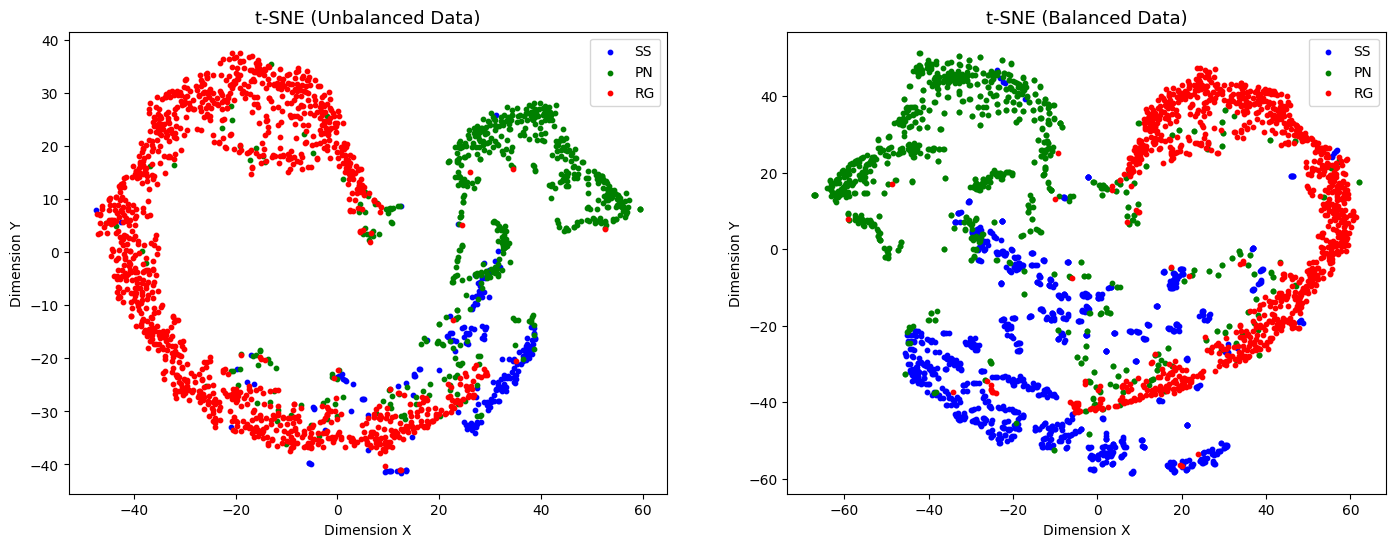

In [22]:
# Configuración de colores y tamaños
colors = ['blue', 'green', 'red']
labels = ['SS', 'PN', 'RG']
point_size = 10

# Crear la figura y los ejes de las subtramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))

(X_embedded, y) = tsne_2d("../../new/datasets/unbalanced.csv")

for i in range(len(colors)):
    ax1.scatter(X_embedded[y == i, 0], X_embedded[y == i, 1], c=colors[i], s=point_size, label=labels[i])

ax1.set_xlabel('Dimension X', fontsize=10)
ax1.set_ylabel('Dimension Y', fontsize=10)
ax1.set_title('t-SNE (Unbalanced Data)', fontsize=13)
ax1.legend(fontsize=10)

(X_embedded, y) = tsne_2d("../../new/datasets/balanced.csv")

for i in range(len(colors)):
    ax2.scatter(X_embedded[y == i, 0], X_embedded[y == i, 1], c=colors[i], s=point_size, label=labels[i])

ax2.set_xlabel('Dimension X', fontsize=10)
ax2.set_ylabel('Dimension Y', fontsize=10)
ax2.set_title('t-SNE (Balanced Data)', fontsize=13)
ax2.legend(fontsize=10)

# Ajustar el espaciado entre subtramas
# plt.tight_layout()

# Ajustar la separación entre las figuras
plt.subplots_adjust(hspace=0.7)  # Ajustar el espaciado vertical (hspace)
plt.savefig("tsne-data-2d.svg", format="svg")

# Mostrar el gráfico
plt.show()